# Water Use

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn.objects as so
import matplotlib as mpl
import matplotlib.pyplot as plt
from copy import deepcopy

In [12]:
# change url on your machine!
#url = r"C:\Users\ongwe\OneDrive\Desktop\dtpIII\wateruse\national_wf_175_crops_annual_1990_2019.csv"
wateruse_df: pd.DataFrame = pd.read_csv("../Raw Data/national_wf_175_crops_annual_1990_2019.csv")

cropyield_df: pd.DataFrame = pd.read_csv("../Cleaned Data/df_crop_yield.csv")


/tmp/ipykernel_161/3473605962.py:3: DtypeWarning: Columns (0,3,6,7,8,9,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  wateruse_df: pd.DataFrame = pd.read_csv("../Raw Data/national_wf_175_crops_annual_1990_2019.csv")


,Year,India Rice Yield,China Rice Yield,Thailand Rice Yield,Vietnam Rice Yield
0,1990,2.6125,5.7261,1.9556,3.1815
1,1991,2.6271,5.6402,2.2534,3.1133
2,1992,2.6092,5.8031,2.1745,3.3342
3,1993,2.8303,5.8479,2.0497,3.4815
4,1994,2.8645,5.8311,2.3521,3.5657
5,1995,2.6972,6.0248,2.4158,3.6898
6,1996,2.8226,6.2122,2.4098,3.7689
7,1997,2.8457,6.3192,2.3788,3.8768
8,1998,2.8805,6.3662,2.4180,4.0007
9,1999,2.9782,6.3447,2.4244,4.1018


## Water use dataframe

In [14]:
working_wateruse_df = deepcopy(wateruse_df)
new_header = working_wateruse_df.iloc[2].values # grab the third row for the header
working_wateruse_df = working_wateruse_df[3:] # take the data without the header row
working_wateruse_df.columns = new_header # set the header row as the df header
working_wateruse_df = working_wateruse_df[["year","crop_name", "country_name", "wf_tot_m3_t"]]
working_wateruse_df.columns = ["Year","crop_name", "country_name", "Water Use"]
working_wateruse_df.reset_index(drop=True, inplace=True) 

df_india = working_wateruse_df.loc[(working_wateruse_df["crop_name"] == "Rice") & (working_wateruse_df["country_name"] == "India") , :]
df_india = df_india[["Year", "Water Use"]]
df_india.reset_index(drop=True, inplace=True) 
df_india["Year"] = pd.to_numeric(df_india["Year"])
df_india["Water Use"] = pd.to_numeric(df_india["Water Use"], errors='coerce')

df_china = working_wateruse_df.loc[(working_wateruse_df["crop_name"] == "Rice") & (working_wateruse_df["country_name"] == "China, mainland") ,:]
df_china = df_china[["Year", "Water Use"]]
df_china.reset_index(drop=True, inplace=True) 
df_china["Year"] = pd.to_numeric(df_china["Year"])
df_china["Water Use"] = pd.to_numeric(df_china["Water Use"], errors='coerce')

df_thailand = working_wateruse_df.loc[(working_wateruse_df["crop_name"] == "Rice") & (working_wateruse_df["country_name"] == "Thailand") ,:]
df_thailand = df_thailand[["Year", "Water Use"]]
df_thailand.reset_index(drop=True, inplace=True) 
df_thailand["Year"] = pd.to_numeric(df_thailand["Year"])
df_thailand["Water Use"] = pd.to_numeric(df_thailand["Water Use"], errors='coerce')

df_vietnam = working_wateruse_df.loc[(working_wateruse_df["crop_name"] == "Rice") & (working_wateruse_df["country_name"] == "Viet Nam") ,:]
df_vietnam = df_vietnam[["Year", "Water Use"]]
df_vietnam.reset_index(drop=True, inplace=True) 
df_vietnam["Year"] = pd.to_numeric(df_vietnam["Year"])
df_vietnam["Water Use"] = pd.to_numeric(df_vietnam["Water Use"], errors='coerce')

india_china = pd.merge(df_india, df_china, on="Year", how="inner", suffixes=(" India", " China"))
india_china_thailand = pd.merge(india_china, df_thailand, on="Year", how="inner")
india_china_thailand_vietnam = pd.merge(india_china_thailand, df_vietnam, on="Year", how="inner", suffixes=(" Thailand", " Vietnam"))
working_wateruse_df = india_china_thailand_vietnam
working_wateruse_df.columns = ["Year","India Water Use","China Water Use","Thailand Water Use","Vietnam Water Use"]
display(working_wateruse_df)


,Year,India Water Use,China Water Use,Thailand Water Use,Vietnam Water Use
0,1990,1398.451456,890.768723,2801.857667,1328.817423
1,1991,1412.468478,885.269949,2559.945281,1290.906476
2,1992,1369.645800,898.767256,2614.282257,1270.650182
3,1993,1290.836077,805.938496,2440.991593,1198.310536
4,1994,1357.477217,880.222719,2249.798274,1097.209344
5,1995,1306.269599,835.552767,2387.660821,1146.850298
6,1996,1350.249762,785.533086,2071.595781,1035.770710
7,1997,1372.267261,784.756988,2345.042479,1007.201330
8,1998,1226.596587,772.858095,2419.960932,1132.637192
9,1999,1296.335443,737.439921,2048.445773,900.709517


## Merge crop yield dataframe and water use dataframe

In [16]:
merged_df = pd.merge(working_wateruse_df, cropyield_df, on="Year", how="inner")
merged_df = merged_df[["Year", "India Water Use", "India Rice Yield", "China Water Use", "China Rice Yield", 
                       "Thailand Water Use", "Thailand Rice Yield", "Vietnam Water Use", "Vietnam Rice Yield"]]
display(merged_df)

,Year,India Water Use,India Rice Yield,China Water Use,China Rice Yield,Thailand Water Use,Thailand Rice Yield,Vietnam Water Use,Vietnam Rice Yield
0,1990,1398.451456,2.6125,890.768723,5.7261,2801.857667,1.9556,1328.817423,3.1815
1,1991,1412.468478,2.6271,885.269949,5.6402,2559.945281,2.2534,1290.906476,3.1133
2,1992,1369.645800,2.6092,898.767256,5.8031,2614.282257,2.1745,1270.650182,3.3342
3,1993,1290.836077,2.8303,805.938496,5.8479,2440.991593,2.0497,1198.310536,3.4815
4,1994,1357.477217,2.8645,880.222719,5.8311,2249.798274,2.3521,1097.209344,3.5657
5,1995,1306.269599,2.6972,835.552767,6.0248,2387.660821,2.4158,1146.850298,3.6898
6,1996,1350.249762,2.8226,785.533086,6.2122,2071.595781,2.4098,1035.770710,3.7689
7,1997,1372.267261,2.8457,784.756988,6.3192,2345.042479,2.3788,1007.201330,3.8768
8,1998,1226.596587,2.8805,772.858095,6.3662,2419.960932,2.4180,1132.637192,4.0007
9,1999,1296.335443,2.9782,737.439921,6.3447,2048.445773,2.4244,900.709517,4.1018


## Scatter

### India

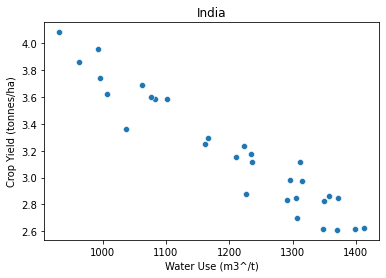

In [20]:
india_plot = sns.scatterplot(data=merged_df, x="India Water Use", y="India Rice Yield")
india_plot.set_title("India")
india_plot.set_ylabel("Crop Yield (tonnes/ha)")
india_plot.set_xlabel("Water Use (m3^/t)")

plt.show()

### China 

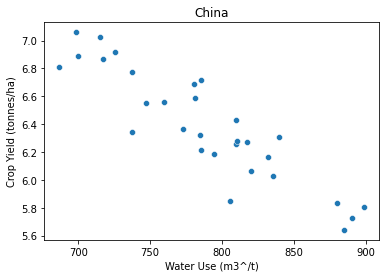

In [22]:
china_plot = sns.scatterplot(data=merged_df, x="China Water Use", y="China Rice Yield")
china_plot.set_title("China")
china_plot.set_ylabel("Crop Yield (tonnes/ha)")
china_plot.set_xlabel("Water Use (m3^/t)")

plt.show()

### Thailand

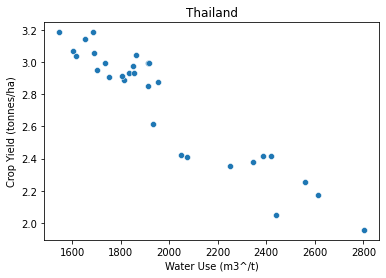

In [24]:
thailand_plot = sns.scatterplot(data=merged_df, x="Thailand Water Use", y="Thailand Rice Yield")
thailand_plot.set_title("Thailand")
thailand_plot.set_ylabel("Crop Yield (tonnes/ha)")
thailand_plot.set_xlabel("Water Use (m3^/t)")

plt.show()

### Vietnam

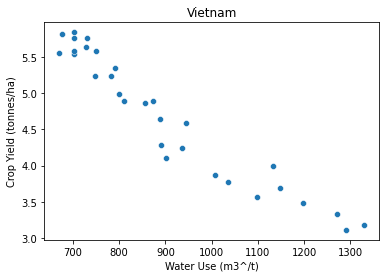

In [25]:
vietnam_plot = sns.scatterplot(data=merged_df, x="Vietnam Water Use", y="Vietnam Rice Yield")
vietnam_plot.set_title("Vietnam")
vietnam_plot.set_ylabel("Crop Yield (tonnes/ha)")
vietnam_plot.set_xlabel("Water Use (m3^/t)")

plt.show()

In [10]:
###Creates a csv file from the dataframe
#working_wateruse_df.to_csv('df_water_usage.csv', index=False)